<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,67.958125,96.632910,79.225544,65.652688,-95.071077,224.398189,334.146725,-109.748536
1,0.0,1.0,58.938081,21.527768,66.010336,42.744163,-14.421765,184.798583,193.701226,-8.902643
2,0.0,2.0,88.230276,73.606737,75.055491,84.576242,-94.380799,237.087947,352.462280,-115.374333
3,0.0,3.0,98.815156,98.582623,38.557753,22.739491,-54.359758,214.335266,210.521207,3.814058
4,0.0,4.0,64.557443,70.827853,59.585445,35.874293,-95.156599,145.688435,221.580980,-75.892545
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.768877,92.669159,25.685942,69.594795,96.041754,341.760527,250.275537,91.484991
29996,999.0,26.0,21.383472,58.008873,83.330699,55.804166,-54.802296,173.724914,236.905702,-63.180788
29997,999.0,27.0,35.536504,39.678893,32.474439,27.610892,69.047217,214.347945,135.201410,79.146535
29998,999.0,28.0,70.600730,42.988890,69.723451,60.666613,-77.362154,176.617530,234.738533,-58.121002


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,67.958125,96.632910,79.225544,65.652688,-95.071077,224.398189,334.146725,-109.748536
1,0.0,1.0,58.938081,21.527768,66.010336,42.744163,-14.421765,184.798583,193.701226,-8.902643
2,0.0,2.0,88.230276,73.606737,75.055491,84.576242,-94.380799,237.087947,352.462280,-115.374333
3,0.0,3.0,98.815156,98.582623,38.557753,22.739491,-54.359758,214.335266,210.521207,3.814058
4,0.0,4.0,64.557443,70.827853,59.585445,35.874293,-95.156599,145.688435,221.580980,-75.892545
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.768877,92.669159,25.685942,69.594795,96.041754,341.760527,250.275537,91.484991
29996,999.0,26.0,21.383472,58.008873,83.330699,55.804166,-54.802296,173.724914,236.905702,-63.180788
29997,999.0,27.0,35.536504,39.678893,32.474439,27.610892,69.047217,214.347945,135.201410,79.146535
29998,999.0,28.0,70.600730,42.988890,69.723451,60.666613,-77.362154,176.617530,234.738533,-58.121002


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,67.958125,96.632910,79.225544,65.652688,-95.071077,224.398189,334.146725,-109.748536
1,0.0,1.0,58.938081,21.527768,66.010336,42.744163,-14.421765,184.798583,193.701226,-8.902643
2,0.0,2.0,88.230276,73.606737,75.055491,84.576242,-94.380799,237.087947,352.462280,-115.374333
3,0.0,3.0,98.815156,98.582623,38.557753,22.739491,-54.359758,214.335266,210.521207,3.814058
4,0.0,4.0,64.557443,70.827853,59.585445,35.874293,-95.156599,145.688435,221.580980,-75.892545
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.768877,92.669159,25.685942,69.594795,96.041754,341.760527,250.275537,91.484991
29996,999.0,26.0,21.383472,58.008873,83.330699,55.804166,-54.802296,173.724914,236.905702,-63.180788
29997,999.0,27.0,35.536504,39.678893,32.474439,27.610892,69.047217,214.347945,135.201410,79.146535
29998,999.0,28.0,70.600730,42.988890,69.723451,60.666613,-77.362154,176.617530,234.738533,-58.121002


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

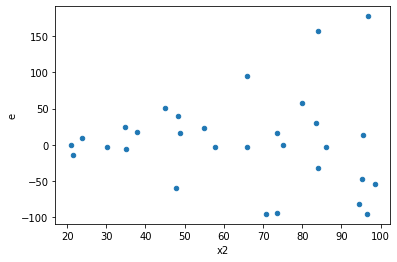

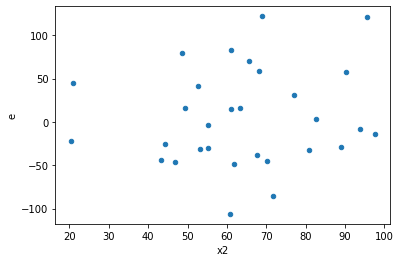

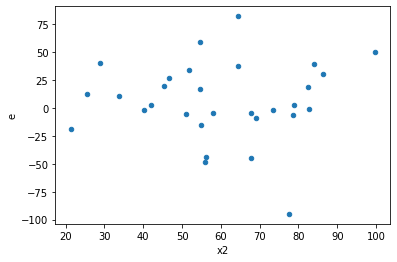

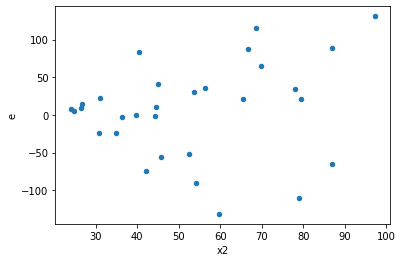

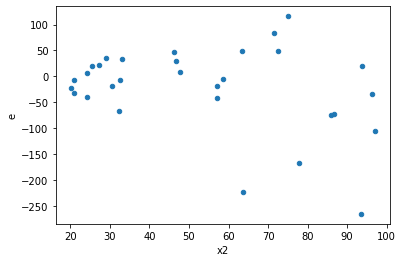

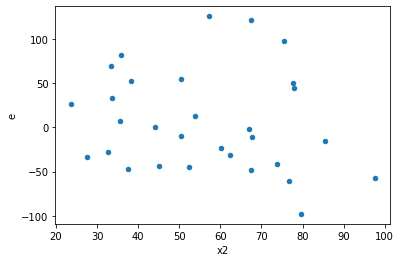

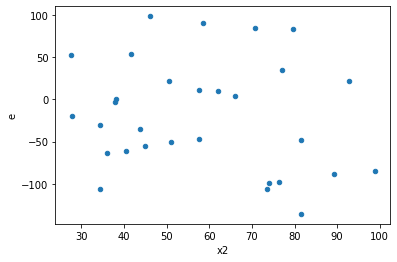

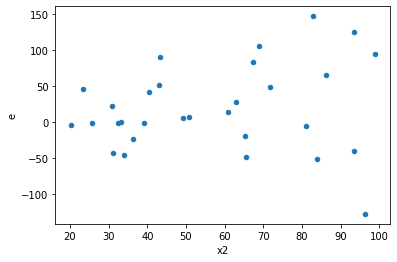

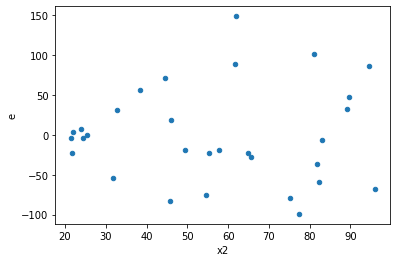

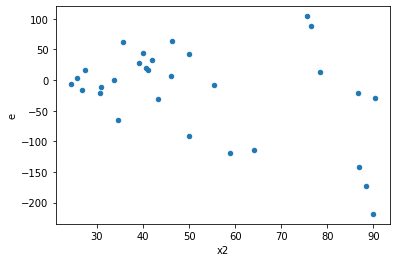

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,6649.6970366105415,41310.85219091317,831.2121295763177,5163.856523864146,6.212441253108574,0.018215615647428685,0.9908921921762857,0.009107807823714342,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,11830.412127917638,40893.63267234363,1478.8015159897047,5111.704084042954,3.456653261963887,0.09860943777647901,0.9506952811117605,0.04930471888823951,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,2617.2007894399467,5136.700891275519,327.15009867999333,642.0876114094399,1.962669777573588,0.3596204967905958,0.8201897516047021,0.1798102483952979,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,9343.841238235718,44269.58916630406,1167.9801547794648,5533.6986457880075,4.737836189376751,0.04129620235782294,0.9793518988210885,0.02064810117891147,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,5797.4941590659455,139027.6069512751,724.6867698832432,17378.45086890939,23.980637692211893,0.00016305578161590617,0.999918472109192,8.152789080795309e-05,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,19918.272906315902,39133.387802879486,2489.784113289488,4891.673475359936,1.9646978423752115,0.3588980602438754,0.8205509698780623,0.1794490301219377,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,29684.923204627423,57508.46712686761,3710.615400578428,7188.558390858451,1.9372954657973622,0.36880607343994765,0.8155969632800262,0.18440303671997382,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,6783.076373454104,54933.496863717024,847.884546681763,6866.687107964628,8.098610989948735,0.0077588304188369595,0.9961205847905815,0.0038794152094184797,Reject005=0 : Heteroscedasticity
8.0,8.0,8.0,18109.354056371776,33829.4172357009,2263.669257046472,4228.677154462613,1.8680631639535492,0.3953095123737258,0.8023452438131371,0.1976547561868629,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,6649.6970366105415,41310.85219091317,831.2121295763177,5163.856523864146,6.212441253108574,0.018215615647428685,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,11830.412127917638,40893.63267234363,1478.8015159897047,5111.704084042954,3.456653261963887,0.09860943777647901,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,2617.2007894399467,5136.700891275519,327.15009867999333,642.0876114094399,1.962669777573588,0.3596204967905958,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,9343.841238235718,44269.58916630406,1167.9801547794648,5533.6986457880075,4.737836189376751,0.04129620235782294,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,5797.4941590659455,139027.6069512751,724.6867698832432,17378.45086890939,23.980637692211893,0.00016305578161590617,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,19918.272906315902,39133.387802879486,2489.784113289488,4891.673475359936,1.9646978423752115,0.3588980602438754,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,29684.923204627423,57508.46712686761,3710.615400578428,7188.558390858451,1.9372954657973622,0.36880607343994765,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,6783.076373454104,54933.496863717024,847.884546681763,6866.687107964628,8.098610989948735,0.0077588304188369595,Reject005=0 : Heteroscedasticity
8.0,8.0,8.0,18109.354056371776,33829.4172357009,2263.669257046472,4228.677154462613,1.8680631639535492,0.3953095123737258,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    563
Reject005=1 : Homoscedasticity      437
Name: Result_test, dtype: int64